1) IMPORTING LIBRARIES

In [1]:

import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [2]:
import spacy

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from wordcloud import WordCloud
import contractions
from textblob import Word
from nltk.corpus import stopwords

import joblib

2) DATA EXTRACTION

In [2]:
data = pd.read_csv('data/IMDB Dataset.csv')

In [3]:
#display first 5 rows from the dataset
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
'''shape attribute returns a tuple representing the dimensions of the
array or dataframe, where the first element is the number of rows and
the second element is the number of columns'''
data.shape

(50000, 2)

In [5]:
#column names
data.columns

Index(['review', 'sentiment'], dtype='object')

In [6]:
#identifying missing values
null_values = data.isnull().sum()
print(null_values[0], null_values[1])

0 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_16648\2644299835.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(null_values[0], null_values[1])


In [7]:
#converting target variable to numeric labels
data.sentiment = [ 1 if each == "positive" else 0 for each in data.sentiment]

In [8]:
#after converting labels
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


sentiment
1    25000
0    25000
Name: count, dtype: int64

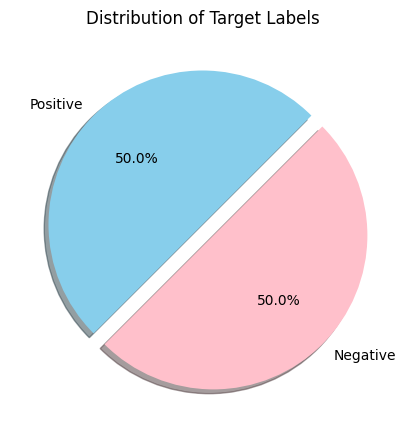

In [9]:
#Plotting the Pie chart
fig = plt.figure(figsize=(5,5))
colors = ["skyblue",'pink']
pos = data[data['sentiment']==1]
neg = data[data['sentiment']==0]
ck = [pos['sentiment'].count(),neg['sentiment'].count()]
piechart = plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%',
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))
plt.title("Distribution of Target Labels")
data.sentiment.value_counts()

3) DATA PREPROCESSING

In [10]:
#HTML tags removal
data['review'] = data['review'].apply(lambda words: re.sub('<.*?>','',words))
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [11]:
#Contractions Expansion
contractions_dict = contractions.contractions_dict
contractions_dict

{"I'm": 'I am',
 "I'm'a": 'I am about to',
 "I'm'o": 'I am going to',
 "I've": 'I have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'd": 'I would',
 "I'd've": 'I would have',
 'Whatcha': 'What are you',
 "amn't": 'am not',
 "ain't": 'are not',
 "aren't": 'are not',
 "'cause": 'because',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "daren't": 'dare not',
 "daresn't": 'dare not',
 "dasn't": 'dare not',
 "didn't": 'did not',
 'didn’t': 'did not',
 "don't": 'do not',
 'don’t': 'do not',
 "doesn't": 'does not',
 "e'er": 'ever',
 "everyone's": 'everyone is',
 'finna': 'fixing to',
 'gimme': 'give me',
 "gon't": 'go not',
 'gonna': 'going to',
 'gotta': 'got to',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he've": 'he have',
 "he's": 'he is',
 "he'll": 'he will',
 "he'll've": 'he will have',
 "he'd": 'he would',
 "he'd've": 'he would have',
 

In [12]:
def contraction_expansion(x):
    if type(x) is str:
        for key in contractions_dict:
            value = contractions_dict[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [13]:
data['review'] = data['review'].apply(lambda x: contraction_expansion(x))

In [14]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there is a family where a little boy...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [15]:
#Converting the text to lowercase
data['review'] = data['review'].apply(lambda x: str(x).lower())
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there is a family where a little boy...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [16]:
#Removing Special Characters
def RemoveSpecialChars(x):
    x = re.sub(r'[^\w ]+', "", x)
    x = ' '.join(x.split())
    return x

In [17]:
data['review'] = data['review'].apply(lambda x: RemoveSpecialChars(str(x)))
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there is a family where a little boy...,0
4,petter matteis love in the time of money is a ...,1


In [18]:
#Removing Stop Words
stop_words = stopwords.words('english') #defining stop_words
stop_words.remove('not') #removing not from the stop_words list as it contains value in negative movies

In [19]:
def RemoveStopWords(x):
    
    return ' '.join([word for word in x.split() if word not in stop_words])

data['review']=data['review'].apply(lambda x: RemoveStopWords(x))

data.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter matteis love time money visually stunni...,1


In [20]:
#Lemmatization
nlp = spacy.load('en_core_web_lg')


def lemme(x):
       
    x = str(x)
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = token.lemma_
        
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
            
        x_list.append(lemma)
        
    return ' '.join(x_list)

In [21]:
data['review'] = data['review'].apply(lambda x: lemme(x))
data.head()

,review,sentiment
0,one reviewer mention watch 1 oz episode hook r...,1
1,wonderful little production filming technique ...,1
2,think wonderful way spend time hot summer week...,1
3,basically family little boy jake think zombie ...,0
4,petter matteis love time money visually stunni...,1


4) FEATURE EXTRACTION

In [31]:
#Split data into features (X) and target (y)
X = data['review'].values
y = data['sentiment'].values

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Vectorize the text data
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=2**18)  #Adjust ngram_range and max_features as needed
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


5) SPLITTING THE DATA INTO TRAIN AND TEST SETS

In [23]:
import time
from joblib import parallel_backend

SVM

In [32]:
#Define and configure the SVM classifier
svm_classifier = LinearSVC(C=0.1, dual=False, max_iter=1000)

#Training
start_time = time.time()
with parallel_backend('threading'):
    svm_classifier.fit(X_train_vectorized, y_train)
svm_train_time = time.time() - start_time

#Cross-validation
cv_start_time = time.time()
cv_scores = cross_val_score(svm_classifier, X_train_vectorized, y_train, cv=5, scoring='accuracy', n_jobs=-1)
cv_time = time.time() - cv_start_time

#Predictions on test set
start_time = time.time()
svm_test_predictions = svm_classifier.predict(X_test_vectorized)
test_time = time.time() - start_time

# Evaluation on test set
svm_accuracy_test = accuracy_score(y_test, svm_test_predictions)
svm_precision_test = precision_score(y_test, svm_test_predictions)
svm_recall_test = recall_score(y_test, svm_test_predictions)
svm_f1_test = f1_score(y_test, svm_test_predictions)
svm_auc_roc_test = roc_auc_score(y_test, svm_test_predictions)


print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

print("\nTest Metrics:")
print("Training Time:", svm_train_time)
print("Test Time:", test_time)
print("Accuracy:", svm_accuracy_test)
print("Precision:", svm_precision_test)
print("Recall:", svm_recall_test)
print("F1 Score:", svm_f1_test)
print("Area Under ROC Curve:", svm_auc_roc_test)


Cross-Validation Scores: [0.89925  0.891    0.90125  0.887625 0.895375]
Mean CV Accuracy: 0.8949

Test Metrics:
Training Time: 1.5265121459960938
Test Time: 0.009962081909179688
Accuracy: 0.9017
Precision: 0.8908347927612376
Recall: 0.9156
F1 Score: 0.903047637834106
Area Under ROC Curve: 0.9017000000000001


LOGISTIC REGRESSION

In [34]:
# Define and configure the logistic regression classifier
logistic_classifier = LogisticRegression(max_iter=1000)

# Training
start_time = time.time()
with parallel_backend('threading'):
    logistic_classifier.fit(X_train_vectorized, y_train)
logistic_train_time = time.time() - start_time

# Cross-validation
cv_start_time = time.time()
cv_scores = cross_val_score(logistic_classifier, X_train_vectorized, y_train, cv=5, scoring='accuracy', n_jobs=-1)
cv_time = time.time() - cv_start_time

# Predictions on test set
start_time = time.time()
logistic_test_predictions = logistic_classifier.predict(X_test_vectorized)
test_time = time.time() - start_time

# Evaluation on test set
logistic_accuracy_test = accuracy_score(y_test, logistic_test_predictions)
logistic_precision_test = precision_score(y_test, logistic_test_predictions)
logistic_recall_test = recall_score(y_test, logistic_test_predictions)
logistic_f1_test = f1_score(y_test, logistic_test_predictions)
logistic_auc_roc_test = roc_auc_score(y_test, logistic_test_predictions)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

print("\nTest Metrics:")
print("Training Time:", logistic_train_time)
print("Test Time:", test_time)
print("Accuracy:", logistic_accuracy_test)
print("Precision:", logistic_precision_test)
print("Recall:", logistic_recall_test)
print("F1 Score:", logistic_f1_test)
print("Area Under ROC Curve:", logistic_auc_roc_test)

Cross-Validation Scores: [0.898375 0.88825  0.89875  0.886375 0.893375]
Mean CV Accuracy: 0.8930250000000001

Test Metrics:
Training Time: 6.8206470012664795
Test Time: 0.009938716888427734
Accuracy: 0.9
Precision: 0.8898635477582846
Recall: 0.913
F1 Score: 0.9012833168805527
Area Under ROC Curve: 0.9


NAIVE BAYES

In [35]:
from sklearn.naive_bayes import MultinomialNB
# Define and configure the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Training
start_time = time.time()
with parallel_backend('threading'):
    nb_classifier.fit(X_train_vectorized, y_train)
nb_train_time = time.time() - start_time

# Cross-validation
cv_start_time = time.time()
cv_scores = cross_val_score(nb_classifier, X_train_vectorized, y_train, cv=5, scoring='accuracy', n_jobs=-1)
cv_time = time.time() - cv_start_time

# Predictions on test set
start_time = time.time()
nb_test_predictions = nb_classifier.predict(X_test_vectorized)
test_time = time.time() - start_time

# Evaluation on test set
nb_accuracy_test = accuracy_score(y_test, nb_test_predictions)
nb_precision_test = precision_score(y_test, nb_test_predictions)
nb_recall_test = recall_score(y_test, nb_test_predictions)
nb_f1_test = f1_score(y_test, nb_test_predictions)
nb_auc_roc_test = roc_auc_score(y_test, nb_test_predictions)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

print("\nTest Metrics:")
print("Training Time:", nb_train_time)
print("Test Time:", test_time)
print("Accuracy:", nb_accuracy_test)
print("Precision:", nb_precision_test)
print("Recall:", nb_recall_test)
print("F1 Score:", nb_f1_test)
print("Area Under ROC Curve:", nb_auc_roc_test)

Cross-Validation Scores: [0.8885   0.87825  0.885125 0.881125 0.8815  ]
Mean CV Accuracy: 0.8829

Test Metrics:
Training Time: 0.12495613098144531
Test Time: 0.05636024475097656
Accuracy: 0.8857
Precision: 0.8876381909547739
Recall: 0.8832
F1 Score: 0.8854135338345865
Area Under ROC Curve: 0.8857


ENSEMBLE

In [36]:

from sklearn.ensemble import VotingClassifier

# Define the ensemble classifier
ensemble_classifier = VotingClassifier(estimators=[
    ('svm', svm_classifier),
    ('logistic', logistic_classifier),
    ('nb', nb_classifier)
], voting='hard')

# Training
start_time = time.time()
with parallel_backend('threading'):
    ensemble_classifier.fit(X_train_vectorized, y_train)
ensemble_train_time = time.time() - start_time

# Cross-validation
cv_start_time = time.time()
cv_scores = cross_val_score(ensemble_classifier, X_train_vectorized, y_train, cv=5, scoring='accuracy', n_jobs=-1)
cv_time = time.time() - cv_start_time

# Predictions on test set
start_time = time.time()
ensemble_test_predictions = ensemble_classifier.predict(X_test_vectorized)
test_time = time.time() - start_time

# Evaluation on test set
ensemble_accuracy_test = accuracy_score(y_test, ensemble_test_predictions)
ensemble_precision_test = precision_score(y_test, ensemble_test_predictions)
ensemble_recall_test = recall_score(y_test, ensemble_test_predictions)
ensemble_f1_test = f1_score(y_test, ensemble_test_predictions)
ensemble_auc_roc_test = roc_auc_score(y_test, ensemble_test_predictions)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

print("\nTest Metrics:")
print("Training Time:", ensemble_train_time)
print("Test Time:", test_time)
print("Accuracy:", ensemble_accuracy_test)
print("Precision:", ensemble_precision_test)
print("Recall:", ensemble_recall_test)
print("F1 Score:", ensemble_f1_test)
print("Area Under ROC Curve:", ensemble_auc_roc_test)


Cross-Validation Scores: [0.899625 0.889375 0.900125 0.88725  0.894625]
Mean CV Accuracy: 0.8942

Test Metrics:
Training Time: 7.525117635726929
Test Time: 0.08483028411865234
Accuracy: 0.9005
Precision: 0.8904269838175083
Recall: 0.9134
F1 Score: 0.9017672030802646
Area Under ROC Curve: 0.9005


RANDOM FOREST

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Define and configure the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=400, max_depth=20, n_jobs=-1, random_state=42)

# Training
start_time = time.time()
with parallel_backend('threading'):
    rf_classifier.fit(X_train_vectorized, y_train)
rf_train_time = time.time() - start_time

# Cross-validation
cv_start_time = time.time()
cv_scores = cross_val_score(rf_classifier, X_train_vectorized, y_train, cv=5, scoring='accuracy', n_jobs=-1)
cv_time = time.time() - cv_start_time

# Predictions on test set
start_time = time.time()
rf_test_predictions = rf_classifier.predict(X_test_vectorized)
test_time = time.time() - start_time

# Evaluation on test set
rf_accuracy_test = accuracy_score(y_test, rf_test_predictions)
rf_precision_test = precision_score(y_test, rf_test_predictions)
rf_recall_test = recall_score(y_test, rf_test_predictions)
rf_f1_test = f1_score(y_test, rf_test_predictions)
rf_auc_roc_test = roc_auc_score(y_test, rf_test_predictions)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

print("\nTest Metrics:")
print("Training Time:", rf_train_time)
print("Test Time:", test_time)
print("Accuracy:", rf_accuracy_test)
print("Precision:", rf_precision_test)
print("Recall:", rf_recall_test)
print("F1 Score:", rf_f1_test)
print("Area Under ROC Curve:", rf_auc_roc_test)

Cross-Validation Scores: [0.859625 0.85125  0.85525  0.8495   0.8535  ]
Mean CV Accuracy: 0.853825

Test Metrics:
Training Time: 38.95804476737976
Test Time: 7.9299657344818115
Accuracy: 0.8593
Precision: 0.8395388395388396
Recall: 0.8884
F1 Score: 0.863278592945292
Area Under ROC Curve: 0.8593


In [46]:
#Evaluate models on the test set
models = {
    'SVM' : svm_classifier,
    'Logistic Regression' : logistic_classifier,
    'Naive Bayes' : nb_classifier,
    'Random Forest' : rf_classifier,
    'Ensemble' : ensemble_classifier
}

In [48]:
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_vectorized, y_train)
    training_time = time.time() - start_time
    
    predictions = model.predict(X_test_vectorized)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    auc = roc_auc_score(y_test, predictions, average='weighted', multi_class='ovr')
    
    print(f"{name}:")
    print(f"  Training Time: {training_time} seconds")
    print(f"  Accuracy: {accuracy*100}%")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}")
    print(f"  AUC: {auc}")
    print()


SVM:
  Training Time: 1.8757123947143555 seconds
  Accuracy: 90.16999999999999%
  Precision: 0.9020106899416145
  Recall: 0.9017
  F1 Score: 0.9016810037867418
  AUC: 0.9017000000000001

Logistic Regression:
  Training Time: 6.5080406665802 seconds
  Accuracy: 90.0%
  Precision: 0.9002705829140499
  Recall: 0.9
  F1 Score: 0.8999830971434172
  AUC: 0.9

Naive Bayes:
  Training Time: 0.07085776329040527 seconds
  Accuracy: 88.57000000000001%
  Precision: 0.8857096427410684
  Recall: 0.8857
  F1 Score: 0.885699285620535
  AUC: 0.8857

Random Forest:
  Training Time: 36.030417919158936 seconds
  Accuracy: 85.92999999999999%
  Precision: 0.8605211717337435
  Recall: 0.8593
  F1 Score: 0.8591807528533238
  AUC: 0.8593

Ensemble:
  Training Time: 7.597940921783447 seconds
  Accuracy: 90.05%
  Precision: 0.9007667663903801
  Recall: 0.9005
  F1 Score: 0.9004834394491587
  AUC: 0.9005



In [49]:
# Initialize a dictionary to store performance metrics
performance_metrics = {
    'Model': [],
    'Training Time': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'AUC': []
}

# Iterate over each model
models = {
    'SVM' : svm_classifier,
    'Logistic Regression' : logistic_classifier,
    'Naive Bayes' : nb_classifier,
    'Random Forest' : rf_classifier,
    'Ensemble' : ensemble_classifier
}

for name, model in models.items():
    
    start_time = time.time()
    model.fit(X_train_vectorized, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    predictions = model.predict(X_test_vectorized)
    
    # Compute performance metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    auc = roc_auc_score(y_test, predictions, average='weighted', multi_class='ovr')
    
    print(f"{name}:")
    print(f"  Training Time: {training_time} seconds")
    print(f"  Accuracy: {accuracy*100}%")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}")
    print(f"  AUC: {auc}")
    print()
    
    # Add metrics to the dictionary
    performance_metrics['Model'].append(name)
    performance_metrics['Training Time'].append(training_time)
    performance_metrics['Accuracy'].append(accuracy*100)
    performance_metrics['Precision'].append(precision)
    performance_metrics['Recall'].append(recall)
    performance_metrics['F1 Score'].append(f1)
    performance_metrics['AUC'].append(auc)

# Convert dictionary to DataFrame
metrics_df = pd.DataFrame(performance_metrics)

# Save DataFrame to CSV file
metrics_df.to_csv('imdb_performance_metrics.csv', index=False)

SVM:
  Training Time: 1.6881542205810547 seconds
  Accuracy: 90.16999999999999%
  Precision: 0.9020106899416145
  Recall: 0.9017
  F1 Score: 0.9016810037867418
  AUC: 0.9017000000000001

Logistic Regression:
  Training Time: 6.868844509124756 seconds
  Accuracy: 90.0%
  Precision: 0.9002705829140499
  Recall: 0.9
  F1 Score: 0.8999830971434172
  AUC: 0.9

Naive Bayes:
  Training Time: 0.0628352165222168 seconds
  Accuracy: 88.57000000000001%
  Precision: 0.8857096427410684
  Recall: 0.8857
  F1 Score: 0.885699285620535
  AUC: 0.8857

Random Forest:
  Training Time: 36.46821212768555 seconds
  Accuracy: 85.92999999999999%
  Precision: 0.8605211717337435
  Recall: 0.8593
  F1 Score: 0.8591807528533238
  AUC: 0.8593

Ensemble:
  Training Time: 8.767369031906128 seconds
  Accuracy: 90.05%
  Precision: 0.9007667663903801
  Recall: 0.9005
  F1 Score: 0.9004834394491587
  AUC: 0.9005



In [50]:
#Initialize a dictionary to store confusion matrices
confusion_matrices = {}

for name, model in models.items():
    #Make predictions
    predictions = model.predict(X_test_vectorized)
    
    #Compute confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    #Store confusion matrix in the dictionary
    confusion_matrices[name] = cm
    
    #Save confusion matrix to a pickle file
    filename = f'imdb_{name}_cm.pkl'
    joblib.dump(cm, filename)


In [51]:
from sklearn.metrics import roc_curve

In [52]:
#Initialize a dictionary to store ROC curve data
roc_curve_data = {}

#Iterate over each model
for name, model in models.items():
    #Make predictions
    predictions = model.predict(X_test_vectorized)
    
    #Compute false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    
    #Store ROC curve data in the dictionary
    roc_curve_data[name] = {'fpr': fpr, 'tpr': tpr}

#Save ROC curve data to a Joblib file
joblib.dump(roc_curve_data, 'imdb_roc_curve_data.joblib')

['imdb_roc_curve_data.joblib']